In [58]:
import numpy as np
import matplotlib
import pandas as pd
from matplotlib import pyplot as plt

In [59]:
data = pd.read_csv('C:\\Users\\Harry\\Documents\\DS\\Datasets\\headbrain.csv')
size = len(X)

In [60]:
data.tail()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120


In [61]:
# Can also use: X = data['Gender'].to_numpy()
X = data['Head Size(cm^3)'].to_numpy()
Y = data['Brain Weight(grams)'].to_numpy()

x_mean = np.mean(X)
y_mean = np.mean(Y)

print(x_mean)
print(y_mean)

3633.9915611814345
1282.873417721519


In [63]:
x_mean_vector = X - x_mean
y_mean_vector = Y - y_mean

covar_xy = x_mean_vector @ y_mean_vector
var_x = x_mean_vector @ x_mean_vector
var_y = y_mean_vector @ y_mean_vector

b1 = cov_xy/var_x
b0 = y_mean - (b1 * x_mean)

print(b1)
print(b0)

0.26342933948939934
325.5734210494426


In [ ]:
residual_vec = Y - (b0 + b1 * X)
rss = residual_vec @ residual_vec

# Residual standard error, RSE is an estimate of standard 
# deviation of error term (epsilon)
rse = np.sqrt(rss/(size-2))

SE_b0 = (rse**2/size) * (1 + x_mean**2/var_x)
SE_b1 (rse**2/(n * var_x))

R_squared = 1 - (rss/var_y)

In [43]:
covariance_x_y = 0
variance_x = 0
for i in range(size):
    covariance_x_y += (X[i]-x_mean) * (Y[i]-y_mean)
    variance_x += (X[i]-x_mean) **2
    
b1 = covariance_x_y/variance_x
b0 = y_mean - (b1 * x_mean)

print(b0)
print(b1)

325.57342104944223
0.26342933948939945


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [75]:
reg = LinearRegression()
X = X.reshape((size,1))
# fitting training data
reg = reg.fit(X, Y)

# If True, X will be copied; else, it may be overwritten.
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

print(reg.coef_[0])
print(reg.intercept_)

0.26342933948939934
325.5734210494426


In [54]:
# Line becomes: 325.5734210494426 + X * 0.26342933948939934
Y_predicted = reg.predict([[5000]])
print(Y_predicted)

# r2_score = reg.score(X,Y)

[1642.7201185]


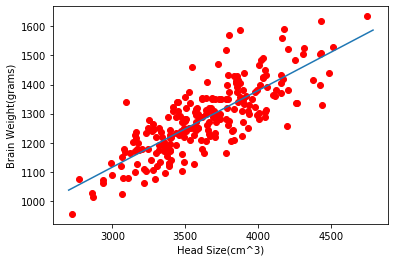

In [83]:
X_test = np.arange(2700, 4800, 10)
X_test = X_test.reshape((len(X_test),1))
Y_test = reg.predict(X_test)

plt.scatter(X, Y, color='r')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.plot(X_test, Y_test)
plt.show()